<a href="https://colab.research.google.com/github/abhijeetkumar79/codsoft-data-science-intern-/blob/main/IRIS_flower_classification_by_abhijeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to display no. of sample in each class
df['species'].value_counts()


,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Preprocessing the dataset

In [ ]:
# check for null values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


EXploratoryn data analysis

<Axes: >

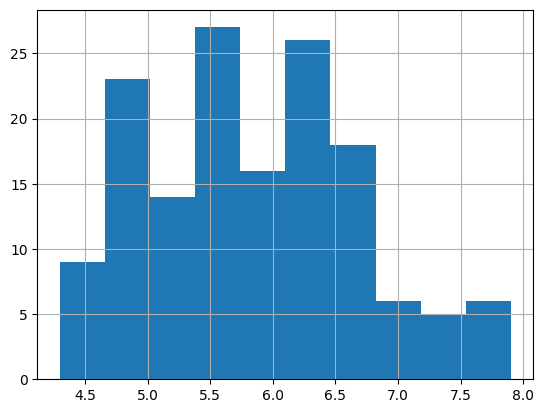

In [ ]:
df['sepal_length'].hist()

<Axes: >

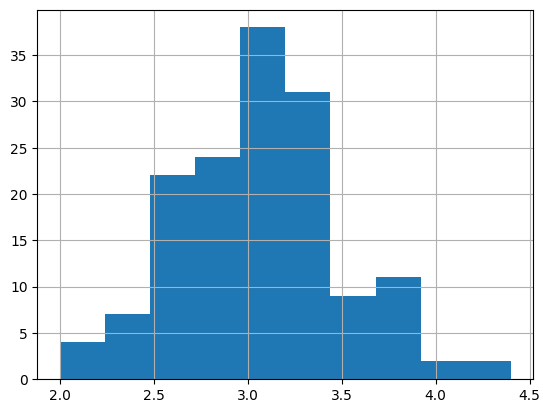

In [ ]:
df['sepal_width'].hist()

<Axes: >

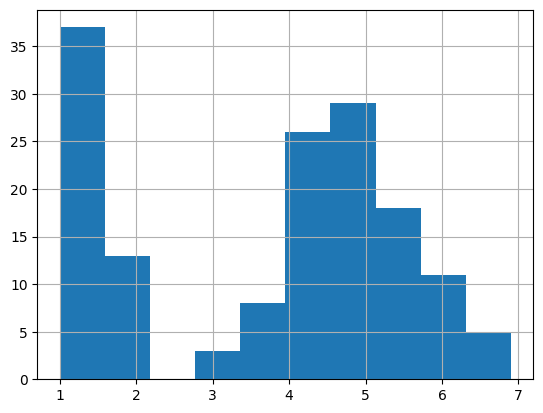

In [ ]:
df['petal_length'].hist()

<Axes: >

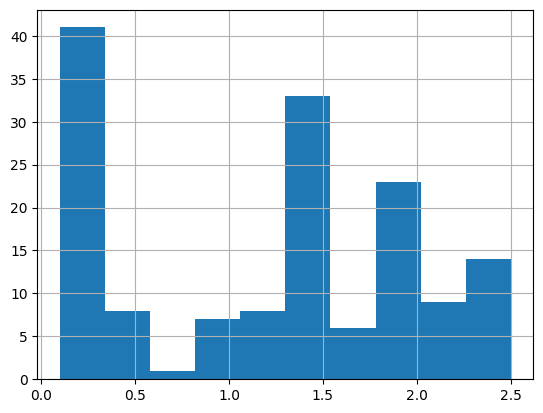

In [ ]:
df['petal_width'].hist()

In [ ]:
# scatterplot
colors = ['red','green','blue']
species = ['setosa','versicolor','virginica']

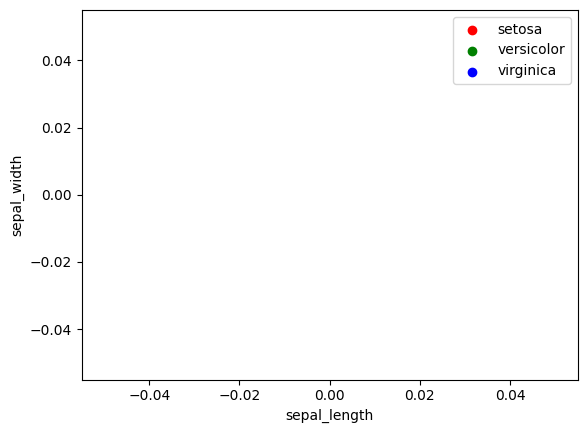

In [ ]:
for i in range (3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label = species[i])
  plt.xlabel('sepal_length')
  plt.ylabel('sepal_width')
  plt.legend()

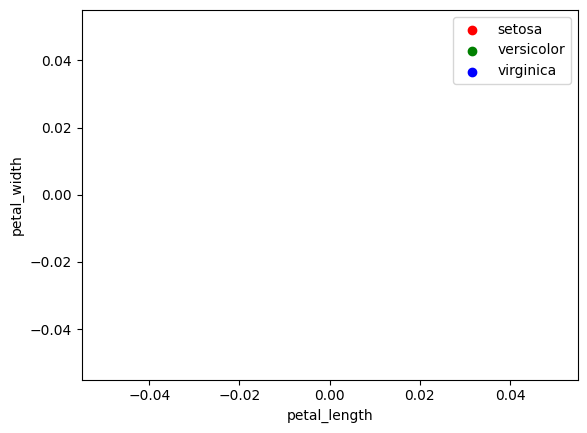

In [ ]:
for i in range (3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label = species[i])
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.legend()

correlation *matrix*

In [ ]:
# Calculate the correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=np.number)
display(numeric_df.corr())

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


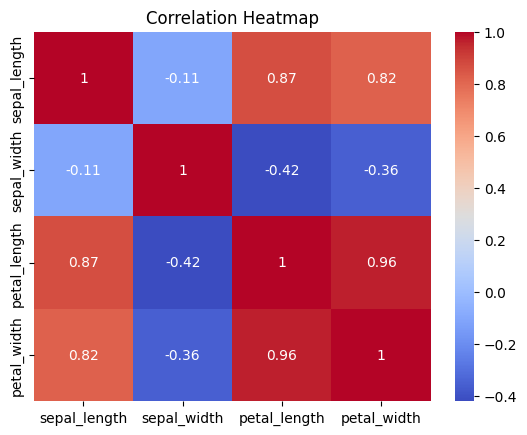

In [ ]:
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model training

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 1.0
